In [84]:
import pandas as pd
import numpy as np
import wget

# for visualization
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
import matplotlib.pyplot as plt
import calmap #pip install calmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [25]:
urls = ['https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/africa_daily_time_series_cases.csv','https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/africa_daily_time_series_deaths.csv',,
       'https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/africa_daily_time_series_recovered.csv']
for url in urls:
    filename = wget.download(url)

100% [................................................................................] 8654 / 8654

In [27]:
conf_af = pd.read_csv('C:/Users/olani/Downloads/Documents/ML Portfolio/notebook/covid-19 notebook/africa_daily_time_series_cases.csv')
deaths_af = pd.read_csv('C:/Users/olani/Downloads/Documents/ML Portfolio/notebook/covid-19 notebook/africa_daily_time_series_deaths.csv')
recv_af = pd.read_csv('C:/Users/olani/Downloads/Documents/ML Portfolio/notebook/covid-19 notebook/africa_daily_time_series_recovered.csv')

In [57]:
dates = conf_af.columns[24:].to_list()
conf_af_concat = conf_af.melt(id_vars=['Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='ConfirmedCases')

deaths_af_concat = deaths_af.melt(id_vars=['Country/Region'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_af_concat = recv_af.melt(id_vars=['Country/Region'],
                              value_vars=dates, var_name='Date', value_name='Recovered')

df = pd.concat([conf_af_concat, deaths_af_concat['Deaths'],recv_af_concat['Recovered']], axis=1, sort=False)

df.head()

,Country/Region,Date,ConfirmedCases,Deaths,Recovered
0,Algeria,2/14/20,0,0,0
1,Angola,2/14/20,0,0,0
2,Benin,2/14/20,0,0,0
3,Burkina Faso,2/14/20,0,0,0
4,Cabo Verde,2/14/20,0,0,0


# Exploratory Data Analysis

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 5 columns):
Country/Region    2640 non-null object
Date              2640 non-null object
ConfirmedCases    2640 non-null int64
Deaths            2640 non-null int64
Recovered         2640 non-null int64
dtypes: int64(3), object(2)
memory usage: 103.2+ KB


In [59]:
# working on the date variable
df.Date = df.Date.astype('datetime64[ns]')
#df.Date = [time.date() for time in df.Date]

In [120]:
df['MortalityRate'] = df['Deaths'] / df['ConfirmedCases']
df['MortalityRate'] = df['MortalityRate'].fillna(0.0) 

,Country/Region,Date,ConfirmedCases,Deaths,Recovered,MortalityRate
0,Algeria,2020-02-14,0,0,0,0.0
1,Angola,2020-02-14,0,0,0,0.0
2,Benin,2020-02-14,0,0,0,0.0
3,Burkina Faso,2020-02-14,0,0,0,0.0
4,Cabo Verde,2020-02-14,0,0,0,0.0


In [121]:
display(df.tail())

,Country/Region,Date,ConfirmedCases,Deaths,Recovered,MortalityRate
2635,Guinea-Bissau,2020-04-13,38,0,0,0.000000
2636,Botswana,2020-04-13,13,1,0,0.076923
2637,Burundi,2020-04-13,5,1,0,0.200000
2638,Sierra Leone,2020-04-13,10,0,0,0.000000
2639,Malawi,2020-04-13,16,2,0,0.125000


In [124]:
# Which country has the highest case of the virus as at 13 April 2020
current = df[df['Date'] == max(df['Date'])].reset_index()
current_case = current.groupby('Country/Region')['ConfirmedCases','Deaths','Recovered','MortalityRate'].sum().reset_index()
highest_case = current.groupby('Country/Region')['ConfirmedCases'].sum().reset_index()
fig = px.bar(highest_case.sort_values('ConfirmedCases', ascending=False)[:10][::-1], 
             x='ConfirmedCases', y='Country/Region',
             title='Confirmed Cases In Africa', text='ConfirmedCases', height=500, orientation='h')
fig.show()

In [110]:
# in confirmed cases over time
c_case =df.groupby('Date')['ConfirmedCases'].sum().reset_index()
fig = px.line(c_case, x="Date", y="ConfirmedCases", 
              title="Confirmed Cases Over Time in Africa")
fig.show()

In [102]:
# countries with the highest death rate
highest_death = current.groupby('Country/Region')['Deaths'].sum().reset_index()
fig = px.bar(highest_death.sort_values('Deaths',ascending=False)[:10][::-1],
            x='Deaths',y='Country/Region',color_discrete_sequence=['Red'],
             title='Death Cases In Africa', text='Deaths', height=500, orientation='h')
fig.show()

In [106]:
# increase in deaths cases over time
death_case = df.groupby('Date')['Deaths'].sum().reset_index()
fig = px.line(death_case, x="Date", y="Deaths", color_discrete_sequence=['Red'],
              title="Deaths Case Over Time")
fig.show()

In [125]:
# the death cases, confirmed cases and mortality rate of african countries as at 13 April 2020
africa_group=current_case.groupby('Country/Region')['ConfirmedCases', 'Deaths','MortalityRate'].sum().reset_index()
africa_group.sort_values('ConfirmedCases', ascending=False)[['Country/Region', 'ConfirmedCases','Deaths','MortalityRate']][:15].style.background_gradient(cmap='Reds')

,Country/Region,ConfirmedCases,Deaths,MortalityRate
37,South Africa,2272,27,0.0118838
12,Egypt,2190,164,0.0748858
0,Algeria,1983,313,0.157842
28,Morocco,1763,126,0.0714691
7,Cameroon,820,12,0.0146341
40,Tunisia,726,34,0.046832
10,Cote d'Ivoire,626,6,0.00958466
19,Ghana,566,8,0.0141343
4,Burkina Faso,497,27,0.054326
31,Nigeria,343,10,0.0291545


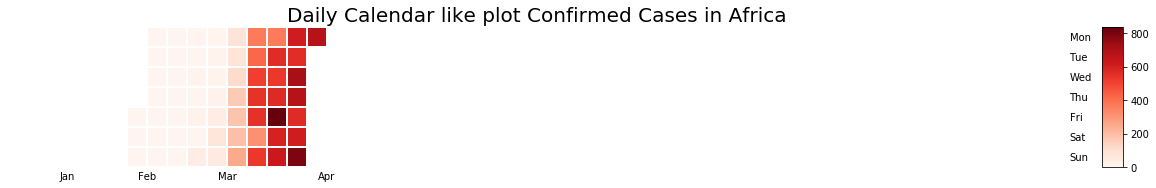

In [132]:
# for confirmed cases
temp = df.groupby('Date')['ConfirmedCases'].sum()
temp = temp.diff()
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
plt.title('Daily Calendar like plot Confirmed Cases in Africa',fontsize=20)
cax = calmap.yearplot(temp, fillcolor='white', ax=ax, cmap='Reds',monthlabels=['Jan', 'Feb', 'Mar', 'Apr'],
                     linewidth=0.9)
divider = make_axes_locatable(cax)
lcax = divider.append_axes("right", size="2%", pad=0.5)
fig.colorbar(cax.get_children()[1], cax=lcax)